# Lab1 Titanic passangers' data analysis
---

By doing this lab you should get acquinted with API of basic machine learning python libraries such as:

* scikit-learn
* numpy
* pandas
* matplotlib

This task will give ?? points

## TASK:

[Kaggle](https://www.kaggle.com/) is a data analysis competition platform. Even if you don't interested in that kind of competitions (but there is assumption that you should be interested), there are a lot of examples of rather good data analysis, called [kernels](https://www.kaggle.com/kernels) in kaggle terminology, that you can consult during this course.

1. You should register on [Kaggle](https://www.kaggle.com/) to be able to download datasets.
2. Download dataset `train.csv` from [Titanic: Machine Learning from Disaster](http://www.kaggle.com/c/titanic-gettingStarted/data). You will find dataset description there as well.
3. Every research or analysis are meaningless without right questions, hypothesises? To warm up you need to find meaningfull answers for the next questions:
    - How many passengers was travelling by first class?
    - What is the most popular female name on board?
    - How does ticket cost varie?
    - What titles (ex.: Mrs., Mr.) you could find in dataset and which class did they travel?
    - Are there any dependencies between class and ticket number?
    - What part of passengers was able to survive?
    - Are there any correlation between the number of brothers/sisters and the number of parents/kids ?
   
4. Try to find some correlations or dependencies manually and support/prove them with graphs or statistics. Find some exact rules describing some subset of survived class. What can you say about interpretation complexity of there rules? 
5. Check the following assumptions:
    - Females survived more frequently than mens
    - Passangers with more expensive tickets survived with higher probability
    
## Report

All reports should be delivered in the format of IPython (Jupyter) Notebooks (`.ipynb` files). 



## TOOLS AND LINKS

  * [Collection of interesting notebooks](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks)

###  Python libraries

  * [NumPy](http://www.numpy.org/)
    - [graph library Matlab](http://wiki.scipy.org/NumPy_for_Matlab_Users)
  * [Pandas](http://pandas.pydata.org/)
    - [how to work with datasets using pandas](http://nbviewer.ipython.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb)
  * [Matplotlib](http://matplotlib.org/index.html)
    - [pyplot](http://matplotlib.org/api/pyplot_api.html) — matlab graph utility emulation in python
    - [example gallery](http://matplotlib.org/gallery.html)
  * [SciPy](http://scipy.org/)





In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(suppress=True)

In [34]:
r = pd.DataFrame.from_csv('train.csv')
r

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


# How many passengers was travelling by first class?

In [4]:
passclass = r.groupby('Pclass')
len(passclass.get_group(1))

216

# What titles (ex.: Mrs., Mr.) you could find in dataset and which class did they travel?

Titles

In [57]:
tit = r.copy()
tit.Name = map(lambda x: x.split(",")[1].split(".")[0][1:], r.Name)
np.unique(tit.Name)

array(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master',
       'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir',
       'the Countess'], dtype=object)

Which class

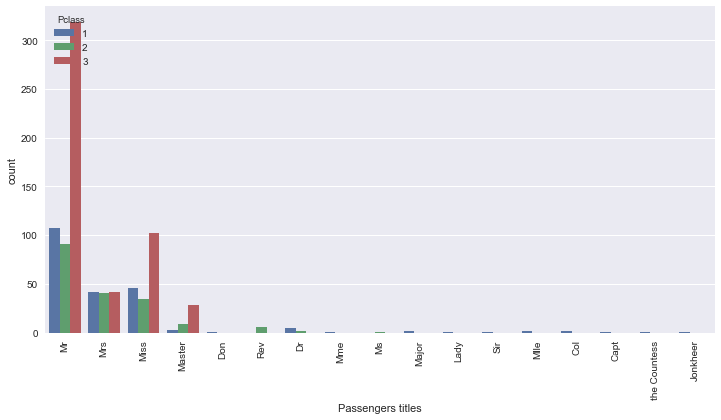

In [6]:
fields = ['Pclass', 'Name']
p = pd.read_csv('train.csv', skipinitialspace=True, usecols=fields)
p['Name'] = [x.split(',')[1].split('.')[0][1:] for x in p['Name']]

fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

plot = sns.countplot(x="Name", hue="Pclass", data=p)
plot.set(xlabel='Passengers titles', ylabel='count')
_ = plt.setp(plot.get_xticklabels(), rotation=90)
#p = pd.DataFrame.from_cs

# What is the most popular female name on board?

C:\Users\mariy\Anaconda2\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


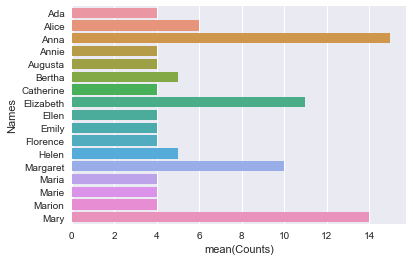

In [7]:
fields = ['Name', 'Sex']
z = pd.read_csv('train.csv', skipinitialspace=True, usecols=fields)
sex = z.groupby('Sex')
females = sex.get_group("female")
def popname(x):
    y = x.split('(')
    if len(y) > 1: 
        q = x.split('(')[1].split(' ')[0]
        if (')') in (q):
            return q[:len(q)-1]
        return q
    else: 
        return x.split('.')[1].split(' ')[1]
females.Name = [popname(i) for i in females.Name]
names, counts = np.unique(females.Name, return_counts = True)
indexes = [x for x in range(len(counts)) if counts[x] > 3]
indexes
z2 = pd.DataFrame({})
z2['Names'] = np.array(names)[indexes]
z2['Counts'] = np.array(counts)[indexes]
sns.barplot(x="Counts", y="Names", data=z2)

Anna is the most popular female name on the board

# How does ticket cost varie?

In [8]:
print("max_cost = ", np.max(r.Fare))
print("min_cost = ", np.min(r.Fare))
print("mean_cost = ", np.mean(r.Fare))
print("standard_deviation = ", np.std(r.Fare))

('max_cost = ', 512.32920000000001)
('min_cost = ', 0.0)
('mean_cost = ', 32.2042079685746)
('standard_deviation = ', 49.66553444477411)


# What part of passengers was able to survive?

In [15]:
survivors = r.groupby('Survived')
sur_part = len(survivors.get_group(1))/float(len(r))
print "part of survived passengers = ", sur_part

part of survived passengers =  0.383838383838


# Are there any dependencies between class and ticket number?

In [17]:
def ticket(x):
    y = x.split(' ')
    if len(y) > 1: 
        q = x.split(' ')[1]
        try:
            return int(q[0])
        except:
            return -1
    else: 
        try:
            return int(x[0])
        except:
            return -1
ticket_number = [ticket(x) for x in r["Ticket"]]
z3 = pd.DataFrame({})
z3['Pclass'] = r.Pclass
z3['Ticket'] = ticket_number
index = [x for x in range(len(z3)) if int(z3['Pclass'].iloc[x]) == int(z3['Ticket'].iloc[x])]
print "Possibility of matching of class number and first digit in Ticket number is", float(len(index))/float(len(z3))

Possibility of matching of class number and first digit in Ticket number is 0.725028058361


# Are there any correlation between the number of brothers/sisters and the number of parents/kids?

In [18]:
fields = ['SibSp', 'Parch']
z4 = pd.read_csv('train.csv', skipinitialspace=True, usecols=fields)
corrmat = z4.corr()
corrmat

,SibSp,Parch
SibSp,1.000000,0.414838
Parch,0.414838,1.000000


In [21]:
fields = ['SibSp', 'Parch']
z4 = pd.read_csv('train.csv', skipinitialspace=True, usecols=fields)
# corr.z4
ind1 = [x for x in range(len(z4)) if (int(z4['SibSp'].iloc[x]) > 1) and (int(z4['Parch'].iloc[x]) > 0)]
ind2 = [x for x in range(len(z4)) if int(z4['SibSp'].iloc[x]) > 1]
print "Possibility of any parches exists aboard if there are more than 1 siblings is",float(len(ind1))/float(len(ind2))

Possibility of any parches exists aboard if there are more than 1 siblings is 0.756756756757


In [22]:
ind3 = [x for x in range(len(z4)) if (int(z4['SibSp'].iloc[x]) == 0) and (int(z4['Parch'].iloc[x]) == 0)]
ind4 = [x for x in range(len(z4)) if int(z4['SibSp'].iloc[x]) == 0]
print "Possibility of any parches doesn't exist aboard if there are no siblings is",float(len(ind3))/float(len(ind4))

Possibility of any parches doesn't exist aboard if there are no siblings is 0.883223684211


# Check the following assumptions: Females survived more frequently than mens

[<matplotlib.text.Text at 0xd8fc2e8>, <matplotlib.text.Text at 0xd8535c0>]

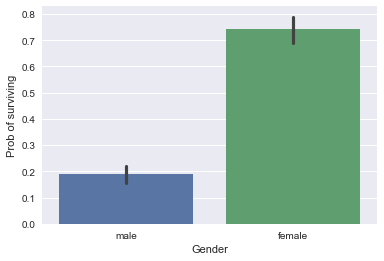

In [23]:
p = sns.barplot(x="Sex", y="Survived", data=r)
p.set(xlabel='Gender', ylabel='Prob of surviving')

yes, more Females survived

# Passangers with more expensive tickets survived with higher probability

[<matplotlib.text.Text at 0xdb79630>, <matplotlib.text.Text at 0xd9ff630>]

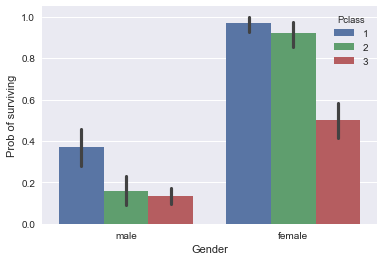

In [24]:
p = sns.barplot(x="Sex", y="Survived", hue="Pclass", data=r)
p.set(xlabel='Gender', ylabel='Prob of surviving')

First class tickets are more expensive, so I checked survival of first class' passengers. The biggest part of survived passengers are first class' passengers

## Try to find some correlations or dependencies manually and support/prove them with graphs or statistics. Find some exact rules describing some subset of survived class. What can you say about interpretation complexity of there rules? 

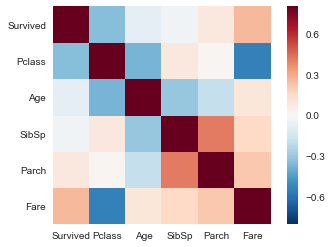

In [33]:
sns.heatmap(r.corr(), vmax=.8, square = True)

more dark color means stronger correlation

### Age-Servival correllation

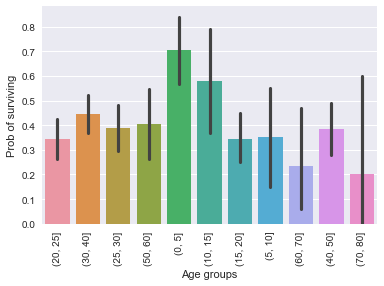

In [49]:
age_groups = [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90]
r["AgeG"] = pd.cut(r["Age"].fillna(-1), bins=age_groups).astype(object)
p = sns.barplot(x="AgeG", y="Survived", data=r)
p.set(xlabel='Age groups', ylabel='Prob of surviving')
_ = plt.setp(p.get_xticklabels(), rotation=90)

Kids (from 0 to 5 years old) survived better

### Age-Class-Servival correlation

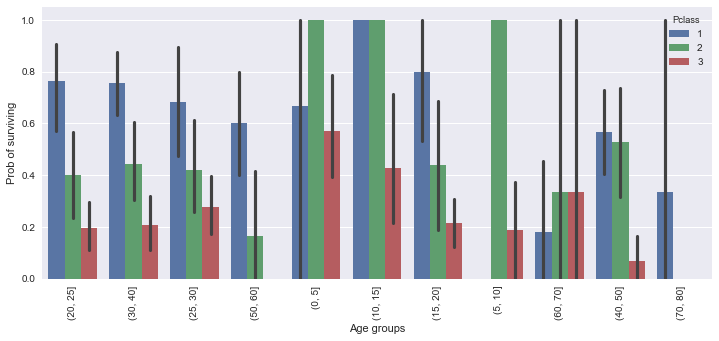

In [50]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)

p = sns.barplot(x="AgeG", y="Survived", hue='Pclass', data=r,ax=ax)
p.set(xlabel='Age groups', ylabel='Prob of surviving')
_ = plt.setp(p.get_xticklabels(), rotation=90)

all kids(from 0 to 15 years old) from 2 class and all kids(from 10 to 15 years old) from 1 class survived

### Title-Survival correlation

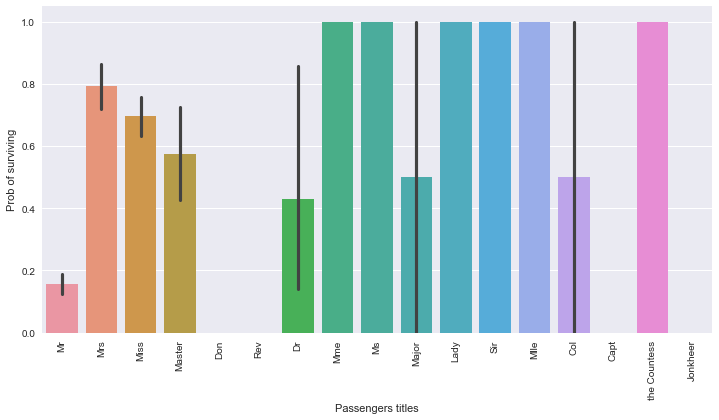

In [58]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

p = sns.barplot(x="Name", y="Survived", data=tit, ax=ax)
p.set(xlabel='Passengers titles', ylabel='Prob of surviving')
_ = plt.setp(p.get_xticklabels(), rotation=90)

As we can see passengers with some titles (Don, Rev., Capt., Jonkheer) didn't survived at all

You can see some rules which describe survived class. These rules are not so complex: obviously passengers tried to save children and women (it is visible even by "survived titles")